## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train_dataset.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [195]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs

# 시각화

import matplotlib.pyplot as plt
import seaborn as sns

### **나.  학습데이터 불러오기**

In [196]:
data = pd.read_csv('train_dataset.csv', index_col='Unnamed: 0').reset_index(drop=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

In [197]:
data.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [198]:
data.url_chinese_present.nunique()

1

In [199]:
data['html_num_tags(\'applet\')'].nunique()

1

In [200]:
data.shape

(3664, 24)

# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

## <b>Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

# <b>Step 2. 데이터 전처리
---

## <b>Q3. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

### <span style="color:darkred">[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

In [201]:
# 데이터 프레임의 info를 확인합니다.

data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

(3664, 24)

In [202]:
# 중복 데이터 제거를 제거합니다.

data = data.drop_duplicates()

In [203]:
# 데이터 프레임의 info를 확인합니다.

data.shape

(3233, 24)

In [204]:
# 값의 종류가 1개인 column 삭제
# url_chinese_present, html_num_tags('applet')

data = data.loc[:, data.nunique()!=1]

In [205]:
data.shape

(3233, 22)

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 0 to 3663
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3233 non-null   float64
 1   url_num_hyphens_dom      3233 non-null   float64
 2   url_path_len             3232 non-null   float64
 3   url_domain_len           3232 non-null   float64
 4   url_hostname_len         3233 non-null   float64
 5   url_num_dots             3233 non-null   float64
 6   url_num_underscores      3233 non-null   float64
 7   url_query_len            3233 non-null   float64
 8   url_num_query_para       3233 non-null   float64
 9   url_ip_present           3233 non-null   float64
 10  url_entropy              3233 non-null   float64
 11  url_port                 3233 non-null   float64
 12  html_num_tags('iframe')  3233 non-null   float64
 13  html_num_tags('script')  3233 non-null   float64
 14  html_num_tags('embed')  

---

## <b>Q4. 텍스트와 범주형 특성 처리

### 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* replace(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
* unique(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

### <span style="color:blue">[예시] df_ex 데이터 프레임에서 replace 함수를 활용 'CA'는'California'로 'NY'는 'NewYork'으로 변경합니다.<span>

In [207]:
import pandas as pd

df_ex = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie', 'Dave', 'Ellen', 'Frank'],
                      'age': [24, 42, 18, 68, 24, 30],
                      'state': ['NY', 'CA', 'CA', 'TX', 'CA', 'NY'],
                      'point': [64, 24, 70, 70, 88, 57]}
                     )

print(df_ex)

      name  age state  point
0    Alice   24    NY     64
1      Bob   42    CA     24
2  Charlie   18    CA     70
3     Dave   68    TX     70
4    Ellen   24    CA     88
5    Frank   30    NY     57


In [208]:
df_ex['state'].replace({'NY': 'NewYork', 'CA': 'California'}, inplace=True)
print(df_ex)

      name  age       state  point
0    Alice   24     NewYork     64
1      Bob   42  California     24
2  Charlie   18  California     70
3     Dave   68          TX     70
4    Ellen   24  California     88
5    Frank   30     NewYork     57


### <span style="color:darkred">[문제2] replace() 함수를 활용 'benign'은 1로 'malicious'은 -1로 변경해주세요. 삭제 후 df['Result_v1'] 전후 데이터를 비교해 보세요.<span>

In [209]:
# 텍스트 데이터를 수치형 데이터로 변경 전 unique() 함수를 통해 유일한 값 확인

data['Result_v1'].unique()

array(['malicious', 'benign'], dtype=object)

In [210]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.

data['Result_v1'].replace({1: 1, 0: 0, 'benign': 1, 'malicious': 0}, inplace=True)

data['Result_v1'].dtype


dtype('int64')

In [211]:
# 텍스트 데이터를 수치형 데이터로 후 unique() 함수를 통해 유일한 값 확인

data['Result_v1'].unique()


array([0, 1], dtype=int64)

---

## <b>Q5. 결측치 처리

### 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
### 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

### <span style="color:darkred">[문제3] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

In [212]:
# 결축치의 존재를 확인합니다.

data.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
Result_v1                  0
dtype: int64

In [213]:
# 결측치를 적절히 처리해줍니다.

data.Result_v1.value_counts()
data.dropna(inplace=True)

In [214]:
# 결축치의 존재를 확인합니다.

data.Result_v1.value_counts()

# 결측치에 해당하는 값이 2개 뿐이므로 dropna를 통해 제거한다

1    1616
0    1615
Name: Result_v1, dtype: int64

---

## <b>Q6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

### AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
### 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

### <span style="color:darkred">[문제4] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

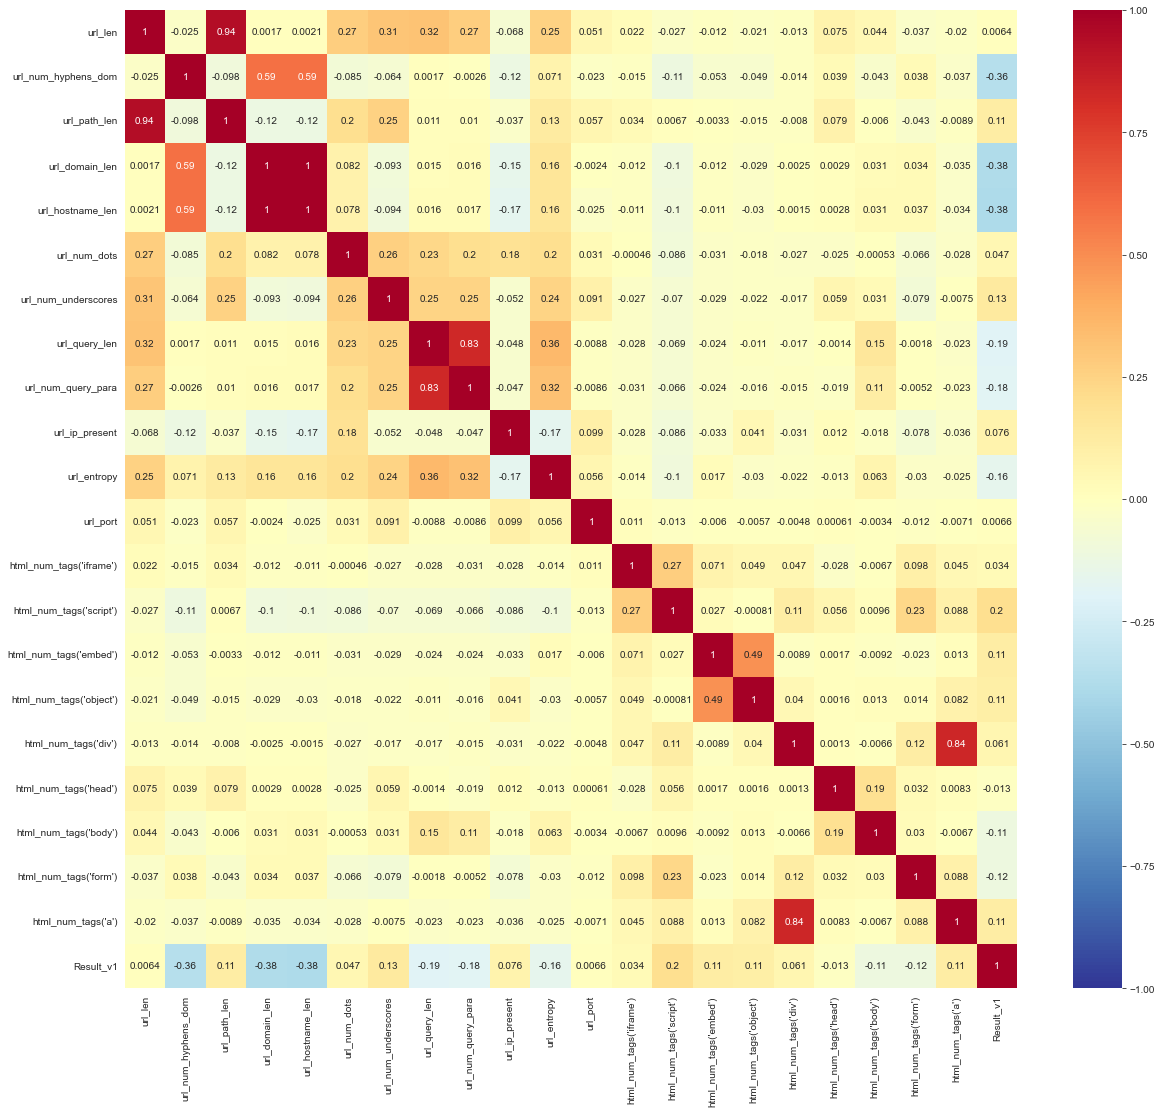

In [231]:
plt.figure(figsize=(20, 18))
sns.heatmap(data.corr(), annot=True, cmap='RdYlBu_r', vmax=1, vmin=-1)
plt.show()

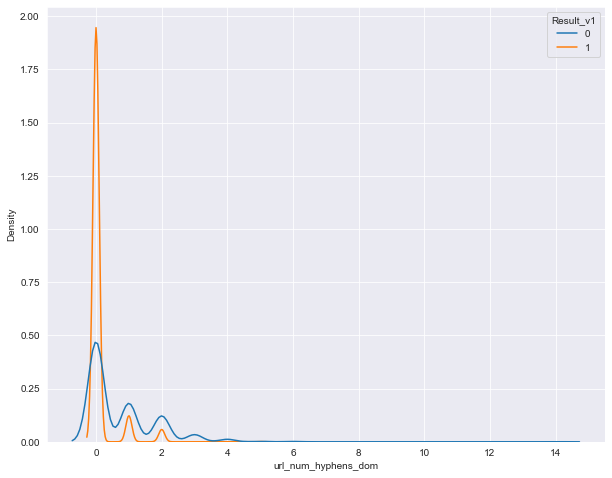

In [216]:
#  url_num_hyphens_dom, url_domain_len, url_hostname_len 과 결과가 강한 음의 상관 관계를 가지므로 한번 확인 해 볼 필요가 있다.

plt.figure(figsize=(10, 8))
sns.kdeplot(x='url_num_hyphens_dom', hue='Result_v1', data=data, multiple='layer')
plt.show()

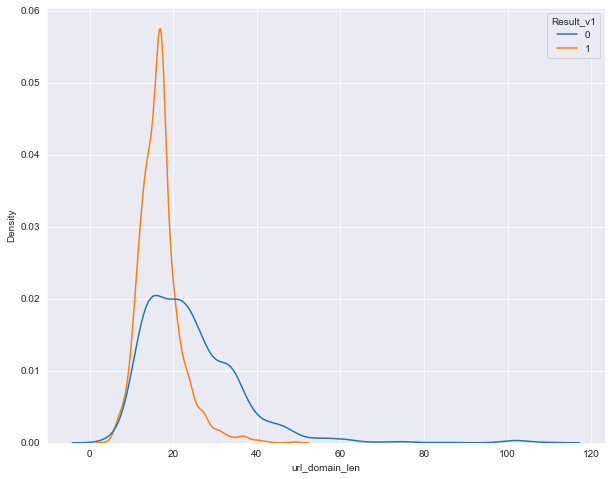

In [217]:
plt.figure(figsize=(10, 8))
sns.kdeplot(x='url_domain_len', hue='Result_v1', data=data, multiple='layer')
plt.show()

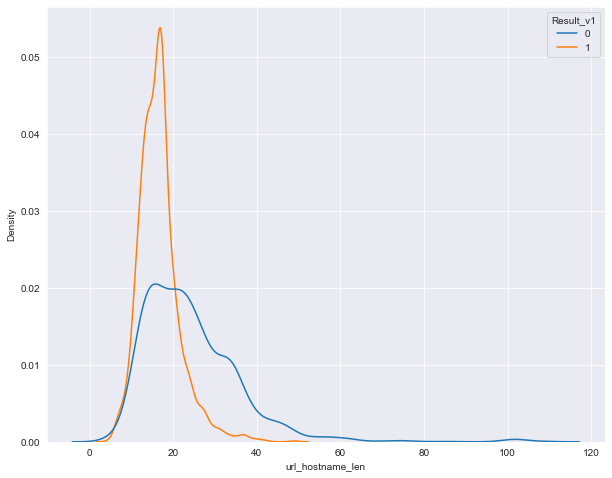

In [218]:
plt.figure(figsize=(10, 8))
sns.kdeplot(x='url_hostname_len', hue='Result_v1', data=data)
plt.show()

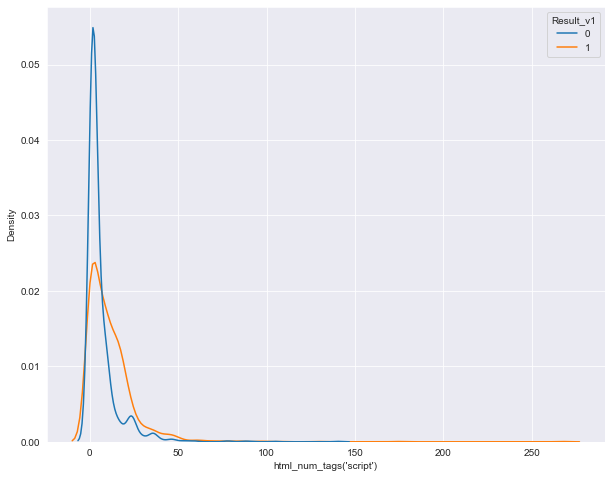

In [219]:
plt.figure(figsize=(10, 8))
sns.kdeplot(x='html_num_tags(\'script\')', hue='Result_v1', data=data, multiple='layer')
plt.show()

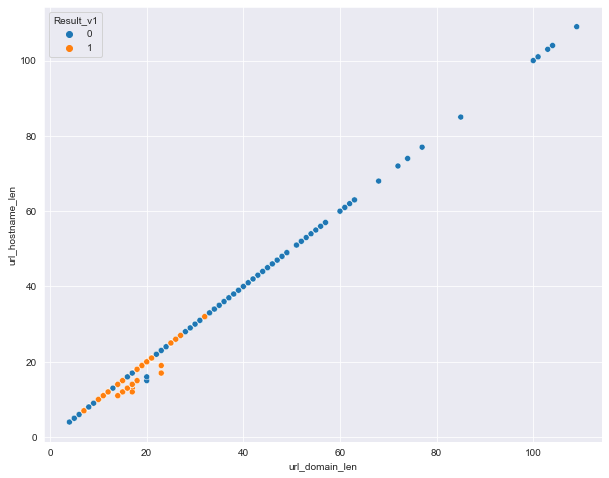

In [220]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="html_", y='url_hostname_len', hue='Result_v1', data=data)
plt.show()

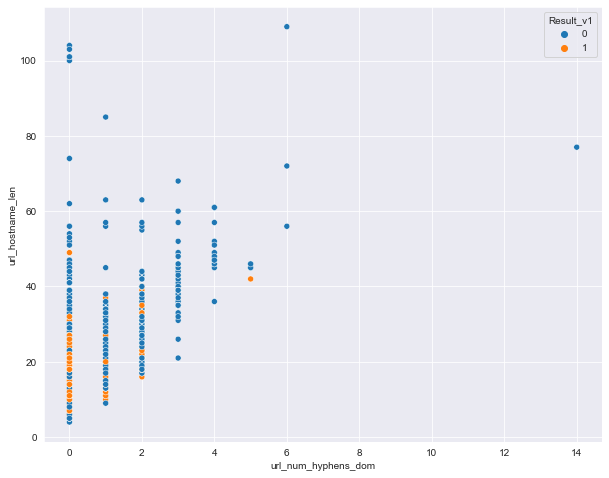

In [174]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='url_num_hyphens_dom', y='url_hostname_len', hue='Result_v1', data=data)
plt.show()

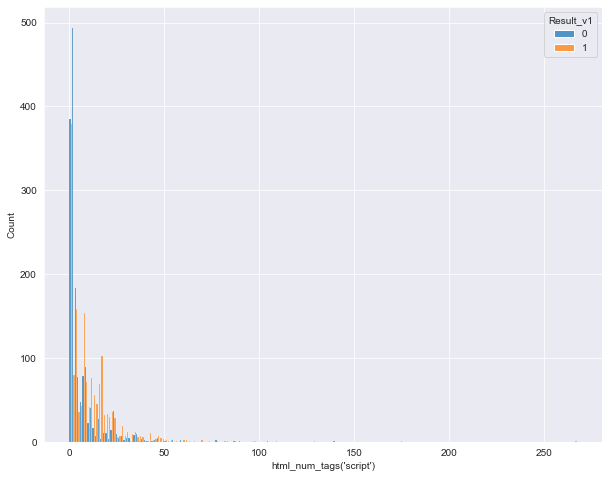

In [188]:
plt.figure(figsize=(10, 8))
sns.histplot(x='html_num_tags(\'script\')', hue='Result_v1', data=data, multiple='dodge')
plt.show()

---

## <b>Q7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

### 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
### 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
### 그러기 위해 Train / Test 데이터로 분리합니다.


**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### <span style="color:darkred">[문제5] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>

In [189]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=.3)

In [190]:
train.shape

(2261, 22)

In [191]:
test.shape

(970, 22)

In [194]:
train.to_csv('./data/train.csv')
data.to_csv('./data/test.csv')

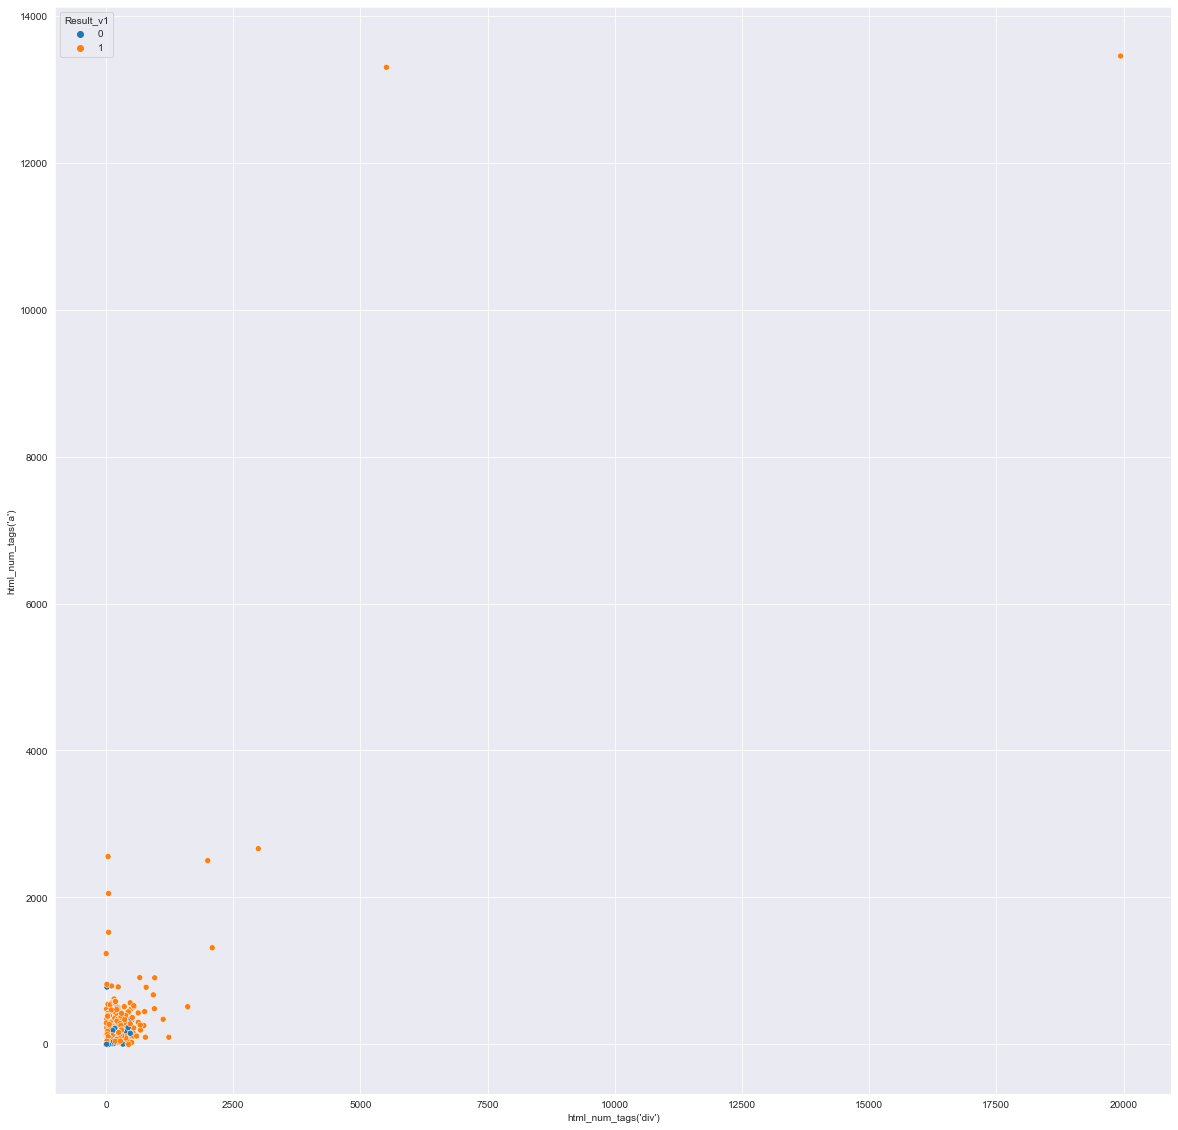

In [225]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x="html_num_tags('div')", y="html_num_tags('a')", hue='Result_v1', data=data)
plt.show()

In [224]:
import scipy.stats as spst

In [226]:
spst.pearsonr(data["html_num_tags('div')"], data["html_num_tags('a')"])

(0.8401247815243219, 0.0)

In [230]:
data.loc[:, ["html_num_tags('div')", "html_num_tags('a')"]].sort_values(by="html_num_tags('div')")

,html_num_tags('div'),html_num_tags('a')
0,0.0,0.0
1571,0.0,0.0
2422,0.0,0.0
295,0.0,0.0
2432,0.0,0.0
...,...,...
139,2087.0,1315.0
2188,2087.0,1315.0
901,2992.0,2664.0
18,5511.0,13298.0


In [235]:
data.loc[:, ["html_num_tags('script')", "html_num_tags('form')"]].describe()

,html_num_tags('script'),html_num_tags('form')
count,3231.000000,3231.000000
mean,8.659239,0.993810
std,12.769059,1.574947
min,0.000000,0.000000
25%,2.000000,0.000000
50%,4.000000,1.000000
75%,12.000000,1.000000
max,267.000000,57.000000


In [236]:
data.loc[:, ["html_num_tags('script')", "html_num_tags('form')"]].value_counts()

html_num_tags('script')  html_num_tags('form')
2.0                      1.0                      447
0.0                      0.0                      316
1.0                      0.0                      174
                         1.0                      146
0.0                      1.0                      105
                                                 ... 
33.0                     0.0                        1
31.0                     3.0                        1
                         2.0                        1
                         0.0                        1
267.0                    1.0                        1
Length: 243, dtype: int64

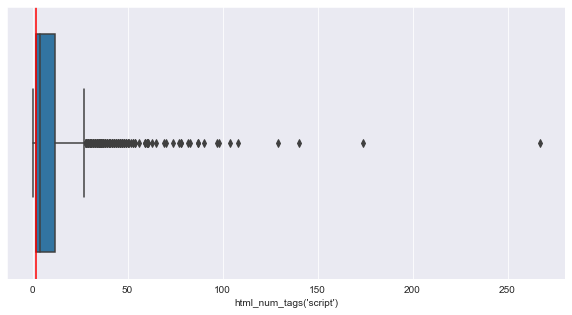

In [246]:
plt.rcParams['figure.figsize'] = 10, 5
sns.boxplot(x="html_num_tags('script')", data=data)
plt.axvline(x=data["html_num_tags('script')"].mode()[0], color='red')
plt.show()

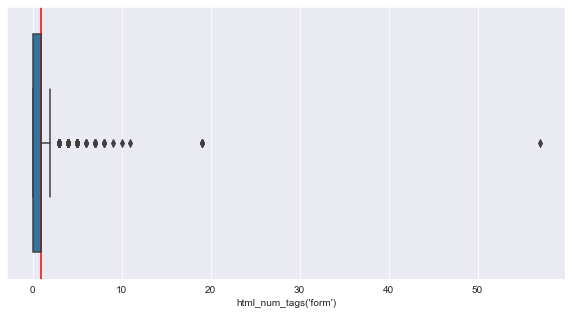

In [247]:
sns.boxplot(x="html_num_tags('form')", data=data)
plt.axvline(x=data["html_num_tags('form')"].mode()[0], color='red')
plt.show()

In [266]:
data["html_num_tags('form')"].mode()

0    1.0
Name: html_num_tags('form'), dtype: float64

In [269]:
test = pd.read_csv('test_dataset_v01.csv')

In [273]:
print(test.isna().sum())

Unnamed: 0                   0
url_len                      0
url_num_hyphens_dom          0
url_path_len               466
url_domain_len             466
url_hostname_len           463
url_num_dots                 0
url_num_underscores          0
url_query_len                0
url_num_query_para           0
url_ip_present               0
url_entropy                  0
url_chinese_present          0
url_port                     0
html_num_tags('iframe')      0
html_num_tags('script')    467
html_num_tags('embed')       0
html_num_tags('object')      0
html_num_tags('div')         0
html_num_tags('head')        0
html_num_tags('body')        0
html_num_tags('form')      467
html_num_tags('a')         461
html_num_tags('applet')      0
dtype: int64


In [282]:
data.groupby(by='Result_v1')[['url_query_len']].nunique()

,url_query_len
Result_v1,
0,78
1,1


In [284]:
data[data.Result_v1 == 1].url_query_len

1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
3655    0.0
3657    0.0
3658    0.0
3660    0.0
3663    0.0
Name: url_query_len, Length: 1616, dtype: float64